In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array


In [2]:
IMG_SIZE = (224,224)

train_ds = image_dataset_from_directory(directory='C:/School/PlantDataset/Train', labels='inferred', label_mode='int', 
                                            batch_size=32, image_size=IMG_SIZE, seed=123)

val_ds = image_dataset_from_directory(directory='C:/School/PlantDataset/Test', labels='inferred', label_mode='int', batch_size=32, 
                                            image_size=IMG_SIZE, seed=123)

Found 800 files belonging to 10 classes.
Found 220 files belonging to 10 classes.


In [3]:
# Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, 
# the input pipeline is reading the data for step s+1.
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip('vertical'),
        layers.RandomZoom(0.1),
        layers.RandomRotation(0.1)
    ]
)

In [2]:
class_names = train_ds.class_names

NameError: name 'train_ds' is not defined

In [7]:
base_model = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3), weights='imagenet', include_top=False)

base_model.trainable = False

inputs_1 = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs_1)

x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

final_output = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model = tf.keras.Model(inputs_1, final_output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
MobilenetV3large (Functional (None, 1, 1, 1280)        4226432   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130  

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
mobilenetv3large_hist = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
25/25 [==============================] - 33s 1s/step - loss: 0.5005 - acc: 0.8575 - val_loss: 0.0689 - val_acc: 0.9909
Epoch 2/20
25/25 [==============================] - 35s 1s/step - loss: 0.0531 - acc: 0.9850 - val_loss: 0.0907 - val_acc: 0.9727
Epoch 3/20
25/25 [==============================] - 26s 954ms/step - loss: 0.0213 - acc: 0.9962 - val_loss: 0.0511 - val_acc: 0.9864
Epoch 4/20
25/25 [==============================] - 25s 962ms/step - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0617 - val_acc: 0.9864
Epoch 5/20
25/25 [==============================] - 24s 937ms/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.0561 - val_acc: 0.9864
Epoch 6/20
25/25 [==============================] - 24s 916ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0546 - val_acc: 0.9864
Epoch 7/20
25/25 [==============================] - 24s 938ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0492 - val_acc: 0.9818
Epoch 8/20
25/25 [==============================] - 24s 949ms/step - loss: 

In [9]:
model.save('C:/School/Thesis/SavedModels/MobilenetV3Large_FCL0.2')

INFO:tensorflow:Assets written to: C:/School/Thesis/SavedModels/MobilenetV3Large_FCL0.2\assets


C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Graph

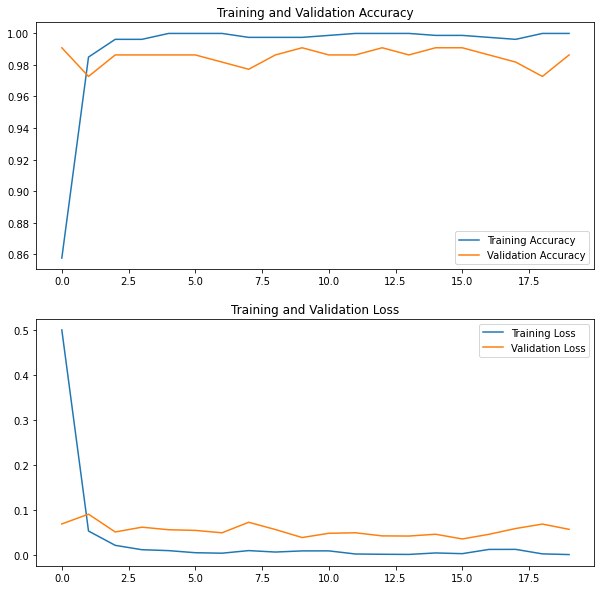

In [10]:
epochs = range(20)
train_acc = mobilenetv3large_hist.history['acc']
val_acc = mobilenetv3large_hist.history['val_acc']
train_loss = mobilenetv3large_hist.history['loss']
val_loss = mobilenetv3large_hist.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(2,1,2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')


In [3]:
mobilenet_model = load_model("C:\School\Thesis\SavedModels\MobilenetV3Large_FCL0.2")

## Prediction

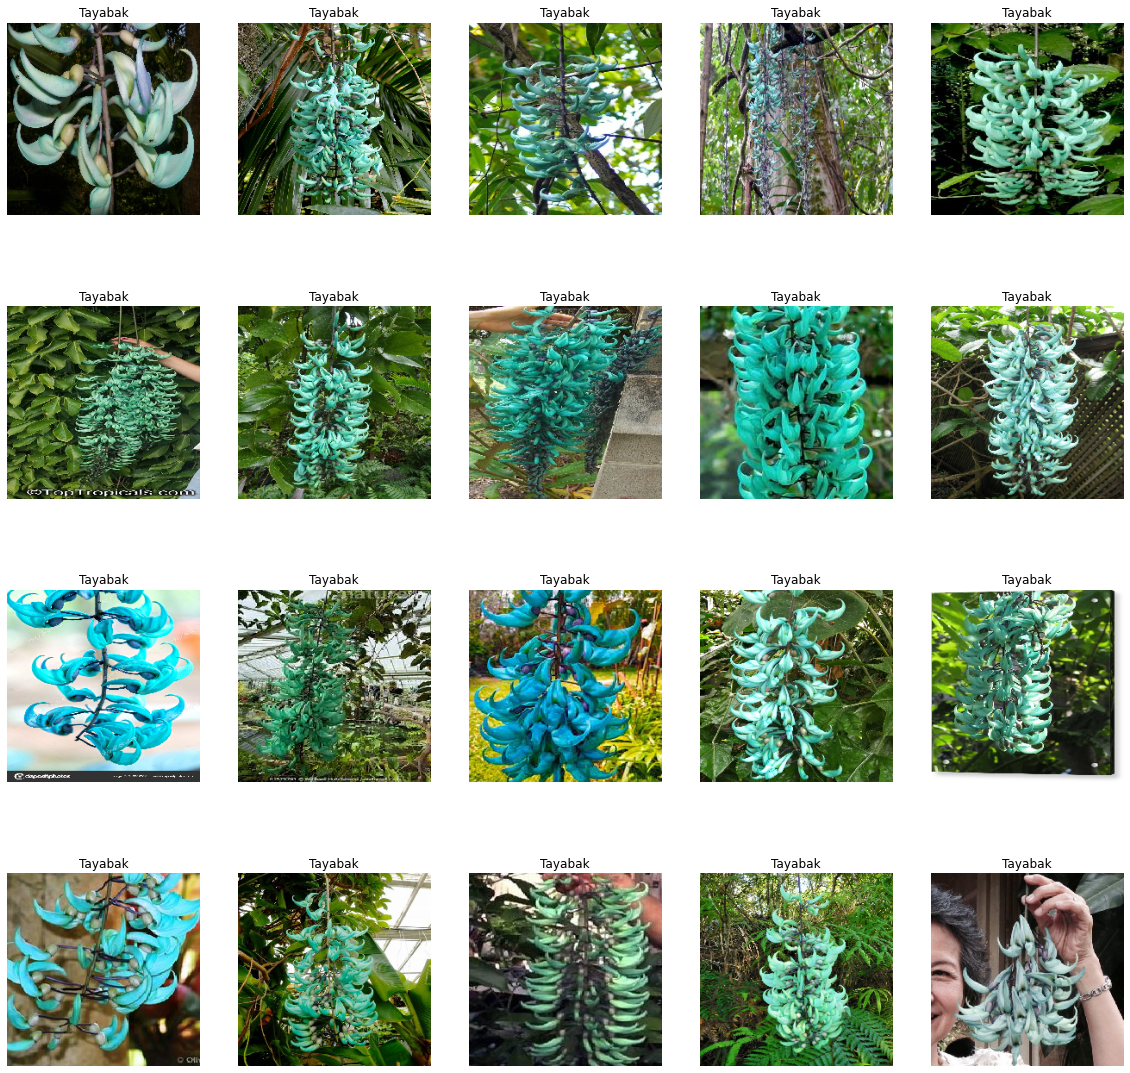

In [16]:
plt.figure(figsize=(20,20))
dir_path = "C:/School/PlantDataset/Test Set/Tayabak"

class_names = ['Anahaw', 'Bagawak Morado', 'Bignay', "Copeland's Pitcher", 
               'Kalingag', 'Katmon', 'Kris Plant', 'Payau', 'Tangisang-Bayawak', 
               'Tayabak']


for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    img = os.path.join(dir_path, os.listdir(dir_path)[i])
    img = load_img(img, target_size=(224,224))
    img_array = img_to_array(img)     
    img_array = img_array
    input_img = np.expand_dims(img_array, axis=0)
    prediction = mobilenet_model.predict(input_img)
    label = np.argmax(prediction)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')

## Fine Tuning

In [12]:
base_model.trainable = True
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
mobilenetv3large_hist_FT = model.fit(train_ds, epochs=10, validation_data=val_ds)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
MobilenetV3large (Functional (None, 1, 1, 1280)        4226432   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130  

In [13]:
model.save('C:/School/Thesis/SavedModels/MobilenetV3Large_FCL0.2FT')

INFO:tensorflow:Assets written to: C:/School/Thesis/SavedModels/MobilenetV3Large_FCL0.2FT\assets


C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Graph

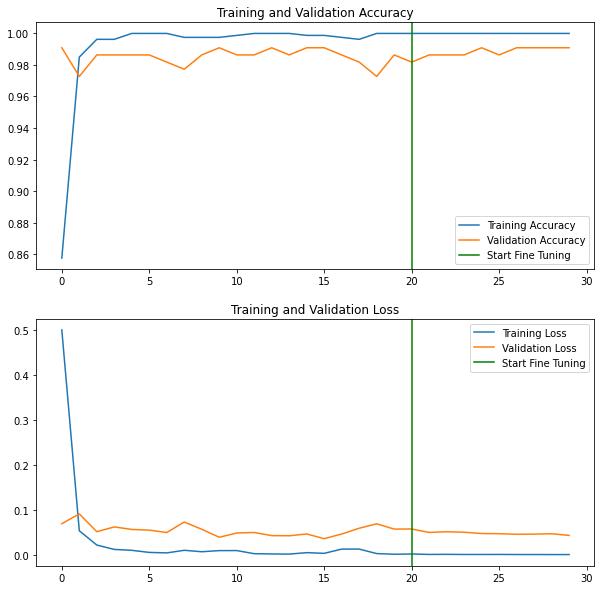

In [14]:
epochs = range(30)
train_acc2 = train_acc + mobilenetv3large_hist_FT.history['acc']
val_acc2 = val_acc + mobilenetv3large_hist_FT.history['val_acc']
train_loss2 = train_loss + mobilenetv3large_hist_FT.history['loss']
val_loss2 = val_loss + mobilenetv3large_hist_FT.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(train_acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.axvline(x=20, ymin=0, ymax=1, color = 'green', label = 'Start Fine Tuning')
plt.legend(loc='lower right')


plt.subplot(2,1,2)
plt.plot(train_loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.axvline(x=20, ymin=0, ymax=1, color = 'green', label = 'Start Fine Tuning')
plt.legend(loc='upper right')


In [4]:
mobilenet_model2 = load_model("C:\School\Thesis\SavedModels\MobilenetV3Large_FCL0.2FT")

## Prediction

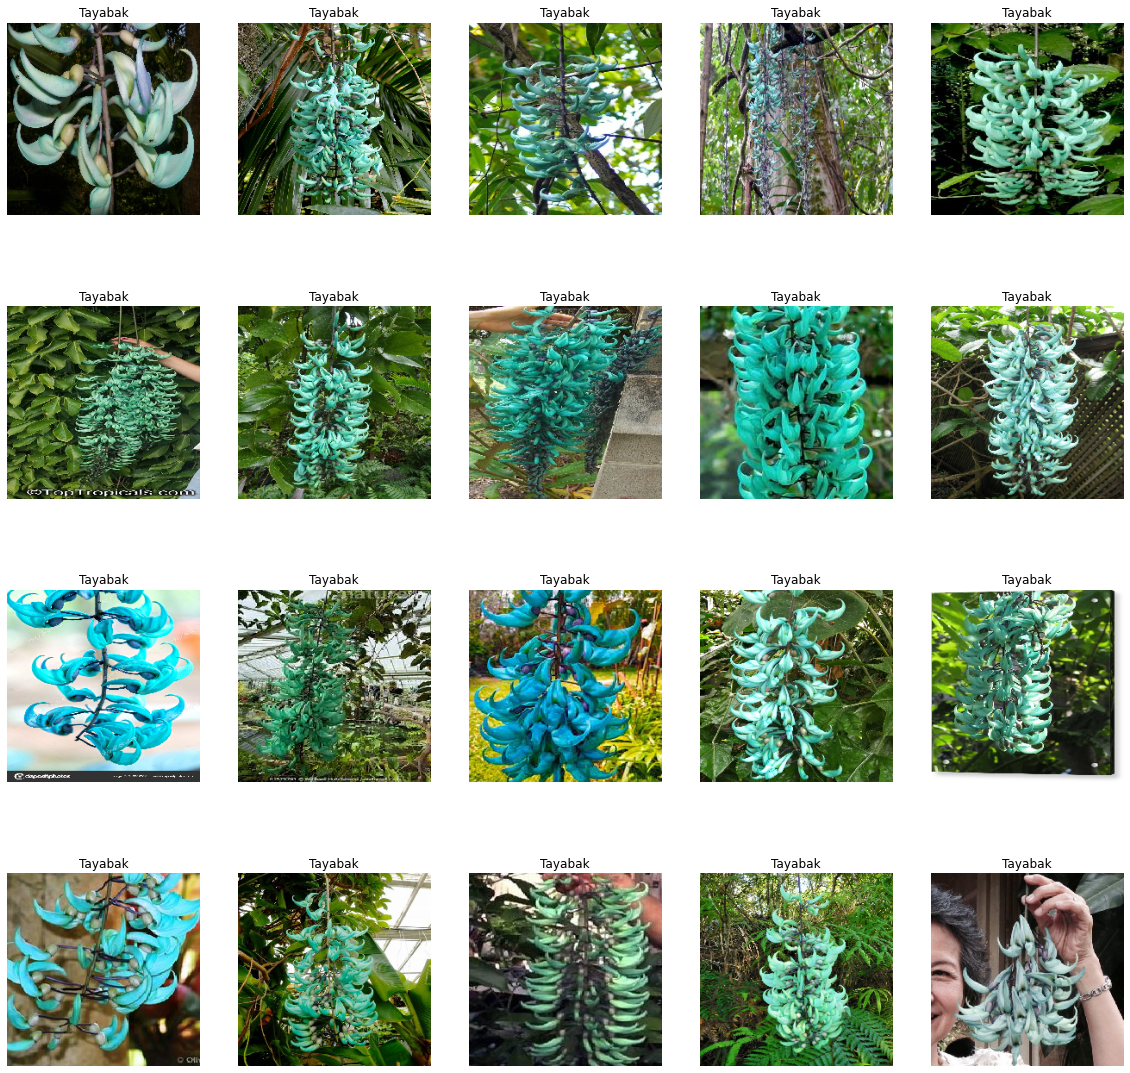

In [26]:
plt.figure(figsize=(20,20))
dir_path = "C:/School/PlantDataset/Test Set/Tayabak"

class_names = ['Anahaw', 'Bagawak Morado', 'Bignay', "Copeland's Pitcher", 
               'Kalingag', 'Katmon', 'Kris Plant', 'Payau', 
               'Tangisang-Bayawak', 'Tayabak']


for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    img = os.path.join(dir_path, os.listdir(dir_path)[i])
    img = load_img(img, target_size=(224,224))
    img_array = img_to_array(img)     
    img_array = img_array
    input_img = np.expand_dims(img_array, axis=0)
    prediction = mobilenet_model2.predict(input_img)
    label = np.argmax(prediction)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')

0.99999785 Tayabak
1.0 Tayabak
1.0 Tayabak
0.99999154 Tayabak
0.99999964 Tayabak
0.99999213 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
0.99999356 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
1.0 Tayabak
0.9987747 Tayabak


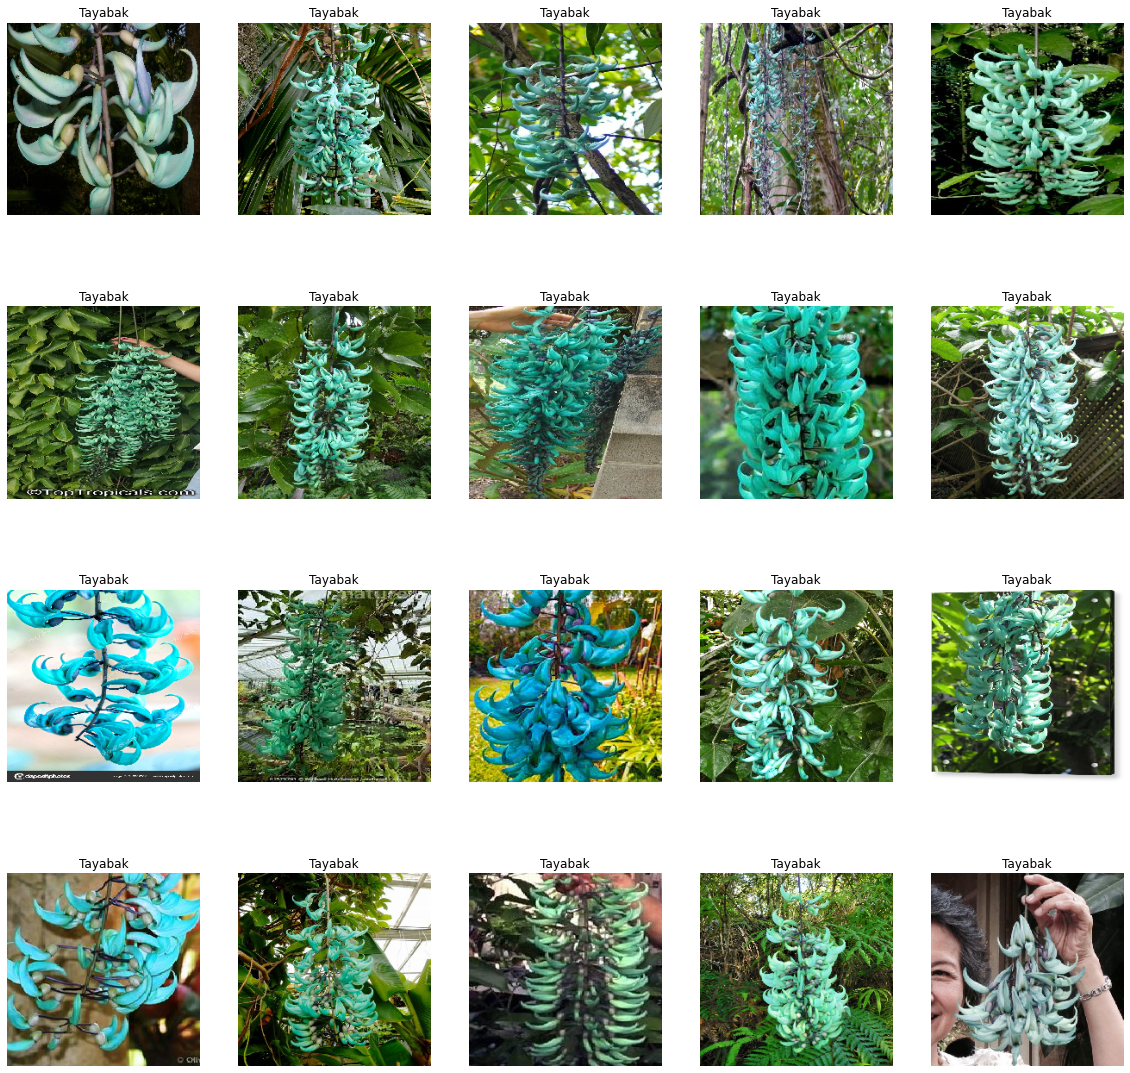

In [15]:
plt.figure(figsize=(20,20))
dir_path = "C:/School/PlantDataset/Test Set/Tayabak"

class_names = ['Anahaw', 'Bagawak Morado', 'Bignay', "Copeland's Pitcher", 
               'Kalingag', 'Katmon', 'Kris Plant', 'Payau', 
               'Tangisang-Bayawak', 'Tayabak']


for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    img = os.path.join(dir_path, os.listdir(dir_path)[i])
    img = load_img(img, target_size=(224,224))
    img_array = img_to_array(img)     
    img_array = img_array
    input_img = np.expand_dims(img_array, axis=0)
    prediction = mobilenet_model2.predict(input_img)
    max = prediction.max()
    if max >= 0.925:
        label = np.argmax(prediction)
        label = class_names[label]
    else:
        label = "Not included in our prediction.";
        
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    print(max,label) #extra lang po ito. patanggal nalang po